In [468]:
#necessary packages are imported
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# different algorithms are imported
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# for checking acuracy
from sklearn.metrics import mean_squared_error # for mse and rmse if sqaured = false it gives rmse

In [469]:
df = pd.read_csv("H2HBABBA3172.csv")
#reading the data into csv file

Go through the data manually

In [470]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH in,2019-10-10 00:00:00,2019.0,1.929927e+09,2019-09-25,20190925,20190925,20191010.0,USD,RV,1.0,NaN,130157.43,20190925.0,NAC6,1.929927e+09,0
1,U001,0200707822,PUBLI co,2019-08-23 00:00:00,2019.0,1.929724e+09,2019-08-08,20190808,20190808,20190823.0,USD,RV,1.0,NaN,98583.21,20190808.0,NAA8,1.929724e+09,0
2,U001,0200744019,TARG co,2019-06-27 00:00:00,2019.0,1.929465e+09,2019-06-12,20190610,20190612,20190627.0,USD,RV,1.0,NaN,19124.26,20190612.0,NAA8,1.929465e+09,0
3,U001,200794332,COST us,NaN,2020.0,1.930671e+09,2020-03-20,20200319,20200320,20200404.0,USD,RV,1.0,NaN,4427.22,20200320.0,NAAX,1.930671e+09,1
4,U001,0200722444,PERFOR co,2020-02-05 00:00:00,2020.0,1.930397e+09,2020-01-14,20200114,20200114,20200129.0,USD,RV,1.0,NaN,6826.15,20200114.0,NAA8,1.930397e+09,0


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [472]:
df.shape

(50000, 19)

In [473]:
# count the unique values and make a data frame with counts as attributes name
coun_t  = df.nunique().to_frame(name = 'Counts')
coun_t

,Counts
business_code,6
cust_number,1402
name_customer,4192
clear_date,401
buisness_year,2
doc_id,48798
posting_date,506
document_create_date,509
document_create_date.1,506
due_in_date,546


In [474]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.00000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999900e+04,50000.000000
mean,2019.30668,2.011547e+09,2.019352e+07,2.019354e+07,2.019369e+07,1.0,NaN,32451.026067,2.019354e+07,2.011397e+09,0.200000
std,0.46112,2.786978e+08,4.494766e+03,4.481336e+03,4.474681e+03,0.0,NaN,39070.523070,4.480899e+03,2.766811e+08,0.400004
min,2019.00000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.650000,2.018121e+07,1.928502e+09,0.000000
25%,2019.00000,1.929342e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4977.587500,2.019051e+07,1.929342e+09,0.000000
50%,2019.00000,1.929968e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17596.205000,2.019091e+07,1.929968e+09,0.000000
75%,2020.00000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47349.122500,2.020013e+07,1.930619e+09,0.000000
max,2020.00000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,436544.160000,2.020052e+07,2.960636e+09,1.000000


In [475]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH in,2019-10-10 00:00:00,2019.0,1.929927e+09,2019-09-25,20190925,20190925,20191010.0,USD,RV,1.0,NaN,130157.43,20190925.0,NAC6,1.929927e+09,0
1,U001,0200707822,PUBLI co,2019-08-23 00:00:00,2019.0,1.929724e+09,2019-08-08,20190808,20190808,20190823.0,USD,RV,1.0,NaN,98583.21,20190808.0,NAA8,1.929724e+09,0
2,U001,0200744019,TARG co,2019-06-27 00:00:00,2019.0,1.929465e+09,2019-06-12,20190610,20190612,20190627.0,USD,RV,1.0,NaN,19124.26,20190612.0,NAA8,1.929465e+09,0
3,U001,200794332,COST us,NaN,2020.0,1.930671e+09,2020-03-20,20200319,20200320,20200404.0,USD,RV,1.0,NaN,4427.22,20200320.0,NAAX,1.930671e+09,1
4,U001,0200722444,PERFOR co,2020-02-05 00:00:00,2020.0,1.930397e+09,2020-01-14,20200114,20200114,20200129.0,USD,RV,1.0,NaN,6826.15,20200114.0,NAA8,1.930397e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200780383,MEIJ associates,2019-05-22 00:00:00,2019.0,1.929270e+09,2019-05-06,20190506,20190506,20190521.0,USD,RV,1.0,NaN,15768.12,20190506.0,NAA8,1.929270e+09,0
49996,U001,0200772595,SAFEW corporation,2020-02-25 00:00:00,2020.0,1.930509e+09,2020-02-10,20200210,20200210,20200225.0,USD,RV,1.0,NaN,66996.33,20200210.0,NAA8,1.930509e+09,0
49997,U001,0200148860,DOLLA co,2019-04-25 00:00:00,2019.0,1.929110e+09,2019-04-10,20190409,20190410,20190425.0,USD,RV,1.0,NaN,56288.34,20190410.0,NAA8,1.929110e+09,0
49998,CA02,0140105847,GORDON F co,2019-05-13 00:00:00,2019.0,2.960545e+09,2019-04-30,20190430,20190430,20190511.0,CAD,RV,1.0,NaN,32927.76,20190501.0,CA10,2.960545e+09,0


# Data Pre-processing

### Null Imputation

In [476]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

Null is checked we can see the numbers of null values in the dataset

In [477]:
df=df.drop(columns=['area_business'])
df.shape

(50000, 18)

### Spiting the data into two parts test and df

In [478]:
#Dataset is splitted into two parts one has the data of clear_data's Nan value and oythe NaN values 
test = df[df['clear_date'].isnull() == True]
test.shape

(10000, 18)

In [479]:
# all the rows with null value are droped i.e clear_data and invoice_id(that has 1 NaN vale) so its 39999
df=df.dropna()
df.shape

(39999, 18)

In [480]:
df.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

### Date Time Conversion

In [481]:
# It is used to change the string into date format string(i.e; "20200413" to "2020-04-13")
def strToDate(dateStr):
    dateFor=''
    dateFor ='-'.join([dateStr[:4], dateStr[4:6], dateStr[6:8]])
    return dateFor
    

In [482]:
df['due_in_date'] = df['due_in_date'].apply(lambda x:strToDate(str(int(x))))
df['document_create_date'] = df['document_create_date'].apply(lambda x:strToDate(str(int(x))))
df['document_create_date.1'] = df['document_create_date.1'].apply(lambda x:strToDate(str(int(x))))
df['baseline_create_date'] = df['baseline_create_date'].apply(lambda x:strToDate(str(int(x))))


# first the string is change to in a string of date fromat i.e;2020-01-04

In [483]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH in,2019-10-10 00:00:00,2019.0,1.929927e+09,2019-09-25,2019-09-25,2019-09-25,2019-10-10,USD,RV,1.0,130157.43,2019-09-25,NAC6,1.929927e+09,0
1,U001,0200707822,PUBLI co,2019-08-23 00:00:00,2019.0,1.929724e+09,2019-08-08,2019-08-08,2019-08-08,2019-08-23,USD,RV,1.0,98583.21,2019-08-08,NAA8,1.929724e+09,0
2,U001,0200744019,TARG co,2019-06-27 00:00:00,2019.0,1.929465e+09,2019-06-12,2019-06-10,2019-06-12,2019-06-27,USD,RV,1.0,19124.26,2019-06-12,NAA8,1.929465e+09,0
4,U001,0200722444,PERFOR co,2020-02-05 00:00:00,2020.0,1.930397e+09,2020-01-14,2020-01-14,2020-01-14,2020-01-29,USD,RV,1.0,6826.15,2020-01-14,NAA8,1.930397e+09,0
5,U001,0200769623,WAL-MAR llc,2019-09-04 00:00:00,2019.0,1.929779e+09,2019-08-25,2019-08-23,2019-08-25,2019-09-09,USD,RV,1.0,25668.13,2019-08-25,NAH4,1.929779e+09,0


In [484]:
df['clear_date'] = pd.to_datetime(df['clear_date'],format='%Y-%m-%d')
df['posting_date'] = pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'],format='%Y-%m-%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'],format='%Y-%m-%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format='%Y-%m-%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format='%Y-%m-%d')

# now the string is change to time format if we have changed the string format the it would be difficult to change

In [485]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [486]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH in,2019-10-10,2019.0,1.929927e+09,2019-09-25,2019-09-25,2019-09-25,2019-10-10,USD,RV,1.0,130157.43,2019-09-25,NAC6,1.929927e+09,0
1,U001,0200707822,PUBLI co,2019-08-23,2019.0,1.929724e+09,2019-08-08,2019-08-08,2019-08-08,2019-08-23,USD,RV,1.0,98583.21,2019-08-08,NAA8,1.929724e+09,0
2,U001,0200744019,TARG co,2019-06-27,2019.0,1.929465e+09,2019-06-12,2019-06-10,2019-06-12,2019-06-27,USD,RV,1.0,19124.26,2019-06-12,NAA8,1.929465e+09,0
4,U001,0200722444,PERFOR co,2020-02-05,2020.0,1.930397e+09,2020-01-14,2020-01-14,2020-01-14,2020-01-29,USD,RV,1.0,6826.15,2020-01-14,NAA8,1.930397e+09,0
5,U001,0200769623,WAL-MAR llc,2019-09-04,2019.0,1.929779e+09,2019-08-25,2019-08-23,2019-08-25,2019-09-09,USD,RV,1.0,25668.13,2019-08-25,NAH4,1.929779e+09,0


### Sort the values according to posting_date. Reason: So that the ML model doesn't get the future data

In [487]:
df.sort_values(by='posting_date',inplace=True)

### Removing the Duplicated and Constant values 

In [488]:
df.cov()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen
buisness_year,1.155731e-01,-1.322204e+06,0.0,-8.041083e+01,-1.322204e+06,0.0
doc_id,-1.322204e+06,7.801884e+16,0.0,2.175245e+12,7.801884e+16,0.0
posting_id,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
total_open_amount,-8.041083e+01,2.175245e+12,0.0,1.566940e+09,2.175245e+12,0.0
invoice_id,-1.322204e+06,7.801884e+16,0.0,2.175245e+12,7.801884e+16,0.0
isOpen,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0


Covariance is checked and we can see posting id and isOpen reltion is 0 with each columns i.e they are constant or same

In [489]:
df.shape
#before removing the duplicates

(39999, 18)

In [490]:
# Check for duplicated colum
df_trans = df.T
df_trans.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1     True
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                    False
dtype: bool

In [491]:
df=df_trans.drop_duplicates(keep='last').T 
# removed the duplicated rows,
# transpose the dataframe back to the variables as columns
# keep first indicates that we keep the first of a set of
# duplicated variables

#shape of data frame
df.shape

(39999, 16)

In [492]:
# check the document id and invoice id as we can see the values are same in data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 45921 to 39056
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39999 non-null  object        
 1   cust_number             39999 non-null  object        
 2   name_customer           39999 non-null  object        
 3   clear_date              39999 non-null  datetime64[ns]
 4   buisness_year           39999 non-null  object        
 5   document_create_date    39999 non-null  datetime64[ns]
 6   document_create_date.1  39999 non-null  datetime64[ns]
 7   due_in_date             39999 non-null  datetime64[ns]
 8   invoice_currency        39999 non-null  object        
 9   document type           39999 non-null  object        
 10  posting_id              39999 non-null  object        
 11  total_open_amount       39999 non-null  object        
 12  baseline_create_date    39999 non-null  da

In [493]:
df['buisness_year']=pd.to_numeric(df['buisness_year'])
df['total_open_amount']=pd.to_numeric(df['total_open_amount'])
df['posting_id']=pd.to_numeric(df['posting_id'])
df['invoice_id']=pd.to_numeric(df['invoice_id'])
df['isOpen']=pd.to_numeric(df['isOpen'])


## Since we have done transpose two time the data type has changed so we changed the data type

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 45921 to 39056
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39999 non-null  object        
 1   cust_number             39999 non-null  object        
 2   name_customer           39999 non-null  object        
 3   clear_date              39999 non-null  datetime64[ns]
 4   buisness_year           39999 non-null  float64       
 5   document_create_date    39999 non-null  datetime64[ns]
 6   document_create_date.1  39999 non-null  datetime64[ns]
 7   due_in_date             39999 non-null  datetime64[ns]
 8   invoice_currency        39999 non-null  object        
 9   document type           39999 non-null  object        
 10  posting_id              39999 non-null  float64       
 11  total_open_amount       39999 non-null  float64       
 12  baseline_create_date    39999 non-null  da

In [495]:
# Removing the unwanted columns
df = df.drop(columns = ['name_customer', 'document_create_date'])
#document_create_date has the normalized column document_create_date.1
#posting_date
#name_customer

In [496]:
df=df.drop(columns='invoice_id')
df.shape

(39999, 13)

In [497]:
df.columns

Index(['business_code', 'cust_number', 'clear_date', 'buisness_year',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'isOpen'],
      dtype='object')

### Constant Features

In [498]:
df.nunique()

business_code                 6
cust_number                1320
clear_date                  401
buisness_year                 2
document_create_date.1      423
due_in_date                 493
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35622
baseline_create_date        431
cust_payment_terms           67
isOpen                        1
dtype: int64

In [499]:
const_feat=[]
for col in list(df.columns):
    if(df[col].nunique()==1):
        const_feat.append(col)

df=df.drop(columns=const_feat)
df.shape
# we have made list of columns having 1 unique value and drop them

(39999, 10)

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 45921 to 39056
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39999 non-null  object        
 1   cust_number             39999 non-null  object        
 2   clear_date              39999 non-null  datetime64[ns]
 3   buisness_year           39999 non-null  float64       
 4   document_create_date.1  39999 non-null  datetime64[ns]
 5   due_in_date             39999 non-null  datetime64[ns]
 6   invoice_currency        39999 non-null  object        
 7   total_open_amount       39999 non-null  float64       
 8   baseline_create_date    39999 non-null  datetime64[ns]
 9   cust_payment_terms      39999 non-null  object        
dtypes: datetime64[ns](4), float64(2), object(4)
memory usage: 4.4+ MB


In [501]:
cat_column=[ 'business_code' ,'cust_number' , 'cust_payment_terms']
for col in cat_column:
    print("Categorical columns: "+col)
    print(df[col].unique())
    print()
print("Unique Values in year column : ")
df['buisness_year'].unique()
# Checking the unique features

Categorical columns: business_code
['U001' 'CA02' 'U013' 'U002' 'U007' 'U005']

Categorical columns: cust_number
['0200726979' '0200769623' '0200799367' ... '0200612306' '100016691'
 '0200718164']

Categorical columns: cust_payment_terms
['NAA8' 'NAH4' 'NAG2' 'CA10' 'NAD5' 'NAU5' 'NAX2' 'NAC6' 'NAD1' 'NAAW'
 'NAAX' 'NA32' 'NAUZ' 'NA3B' 'NA31' 'NA3F' 'NAM1' 'NAM4' 'C106' 'NAM2'
 'NAVQ' 'NAWP' 'NA10' 'NAVF' 'NAVE' 'NAD4' 'BR56' 'NAVM' 'NA9X' 'NAB1'
 'NA38' 'NAWM' 'NAUP' 'NABG' 'NACB' 'NAGD' 'CA30' 'NAV2' 'NAVL' 'NAVC'
 'BR12' 'NA8Q' 'NATH' 'NAD8' 'NA25' 'NA84' 'NAM3' 'NAUX' 'CAX2' 'NATK'
 'NAVR' 'NAWN' 'B052' 'NATL' 'NATM' 'NAVD' 'NAUW' 'NATU' 'NAWU' 'NATV'
 'NATW' 'NATX' 'NATZ' 'CAB1' 'MC15' 'NACE' 'NAUI']

Unique Values in year column : 


array([2019., 2020.])

In [502]:
# For catagorical columns with relatively low unique value (<= 12) -- looking for value_counts
# if unique count ==1 , constant column 

for col in cat_column:
    if df[col].nunique()<= 12:
        print(df[col].value_counts())
        print('#########################')

U001    36158
CA02     3195
U013      522
U002      111
U005       10
U007        3
Name: business_code, dtype: int64
#########################


In [503]:
# clubbing business code with low occurance in dataset - to ensure model gets max information
df['business_code'] = np.where(df['business_code'].isin(["U005","U007"]),"Others",df['business_code'])

In [504]:
df['business_code'].value_counts()

U001      36158
CA02       3195
U013        522
U002        111
Others       13
Name: business_code, dtype: int64

## Split Data

#### Making Target Column

In [505]:
df['delay'] =(df['clear_date'] - df['due_in_date']).dt.days
# dt. days Reason: if we not use then delay column will be of timedelata data types but now it will be int

Due term feature is added to the dataset

In [506]:
# This feature were added and analysed in EDA

df['due_term']=pd.Series(df['due_in_date'] - df['baseline_create_date']).dt.days

#due term --. no of days the customer has to pay after the creation of invoice

In [507]:
df.head(5)

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_term
45921,U001,0200726979,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,190.38,2018-12-30,NAA8,1,15
7889,U001,0200769623,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,26504.09,2018-12-30,NAH4,-4,15
10089,U001,0200799367,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,93297.94,2018-12-30,NAA8,0,15
27283,U001,0200744019,2019-01-22,2019.0,2018-12-30,2019-01-14,USD,1372.00,2018-12-30,NAA8,8,15
44646,U001,0200769623,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,25682.30,2018-12-30,NAH4,1,15


In [508]:
# Spilt the data without target column and just a target column
# X--> without target variable 'delay'
# y--> only tagert varible 'delay'
X = df.drop('delay',axis=1)
y = df['delay']

In [509]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=0 , shuffle = False)

In [510]:
X_train.shape , X_val.shape , X_test.shape

((27999, 11), (6000, 11), (6000, 11))

# Exploratory Data Analysis

In [511]:
# merge the X_train and y_train for EDA
df_eda=X_train.merge(y_train,on = X_train.index)
df_eda.drop(columns=['key_0'],axis=1,inplace=True)
df_eda.head(5)

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,due_term,delay
0,U001,0200726979,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,190.38,2018-12-30,NAA8,15,1
1,U001,0200769623,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,26504.09,2018-12-30,NAH4,15,-4
2,U001,0200799367,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,93297.94,2018-12-30,NAA8,15,0
3,U001,0200744019,2019-01-22,2019.0,2018-12-30,2019-01-14,USD,1372.00,2018-12-30,NAA8,15,8
4,U001,0200769623,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,25682.30,2018-12-30,NAH4,15,1


## Numerical Variables

### Continous Variables

In [512]:
#compare_feature=['business_code','buisness_year','delay','due_term']

In [513]:
df_eda['delay'].describe()

count    27999.000000
mean         1.183149
std         11.317778
min        -89.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        300.000000
Name: delay, dtype: float64

We see that max delay is 300 days and there is payement of (min) 89 days before due date


The mean delay is 1

<AxesSubplot:xlabel='delay', ylabel='Density'>

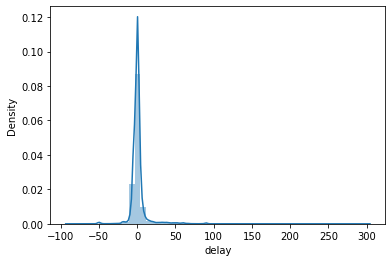

In [514]:
# we can clearly see the how the distrubution is there through sns.displot
sns.distplot(df_eda['delay'])

In [515]:
df_eda['total_open_amount'].describe()

count     27999.000000
mean      31744.655862
std       39654.680821
min           0.650000
25%        4607.930000
50%       16966.480000
75%       45529.460000
max      436544.160000
Name: total_open_amount, dtype: float64

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

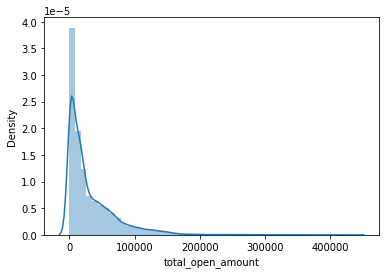

In [516]:
sns.distplot(df_eda['total_open_amount'])

We see the amount column is right skewed distribution

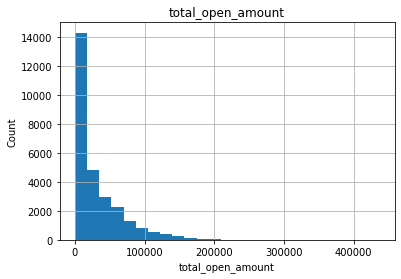

In [517]:
df_eda1=df_eda.copy()
df_eda1['total_open_amount'].hist(bins=25)
plt.xlabel('total_open_amount')
plt.ylabel("Count")
plt.title('total_open_amount')
plt.show()

We can see the more number  of counts for low amount

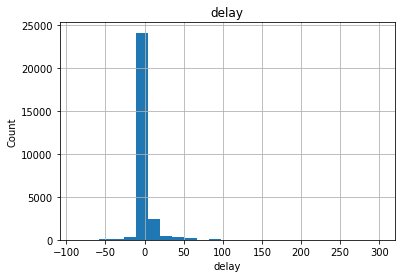

In [518]:
df_eda1=df_eda.copy()
df_eda1['delay'].hist(bins=25)
plt.xlabel('delay')
plt.ylabel("Count")
plt.title('delay')
plt.show()

The values for 0-1 day delay is high. Most of the payments are done in due in date

### Categorical Variables

In [519]:
categorical_features=['business_code','cust_payment_terms']

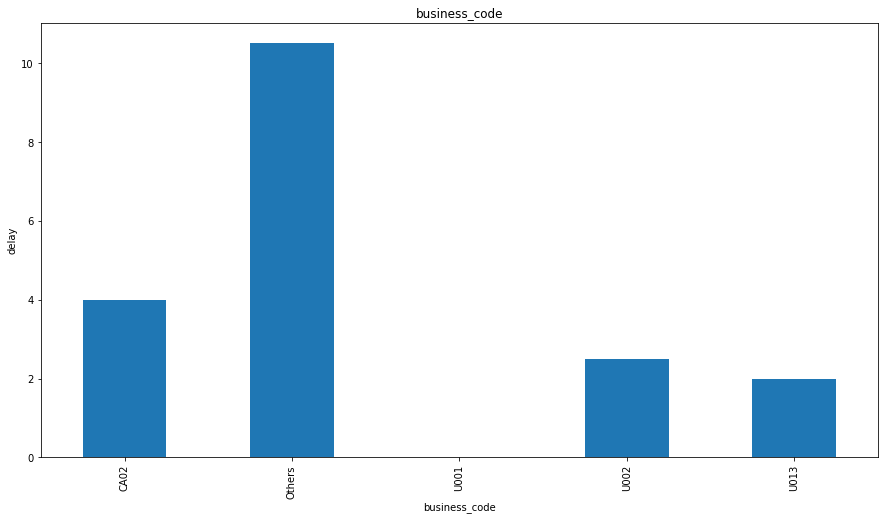

<Figure size 1440x1440 with 0 Axes>

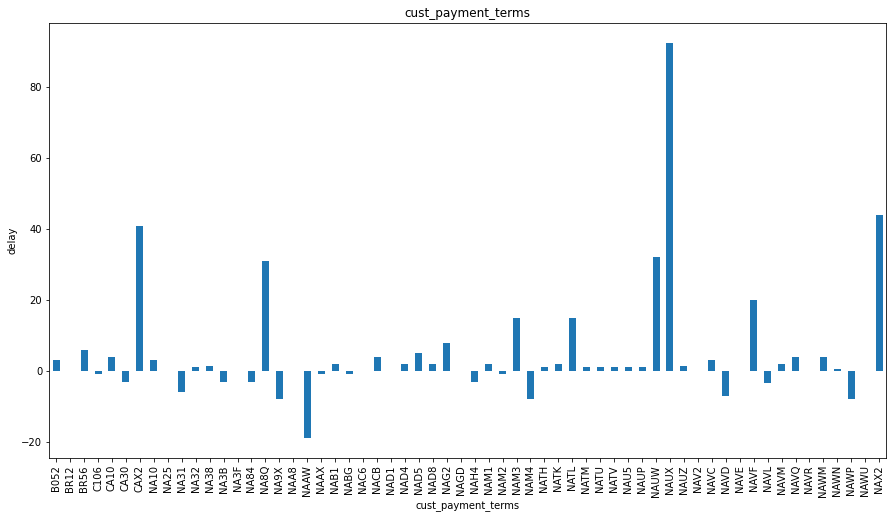

<Figure size 1440x1440 with 0 Axes>

In [520]:
for feature in categorical_features:
    df_eda1=df_eda.copy()
    fig,ax = plt.subplots(figsize=(15,8))
    df_eda1.groupby(feature)['delay'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('delay')
    plt.title(feature)
    plt.figure(figsize=(20,20))
    plt.show()

From Bussiness code we see that some business code  does not have any delay.   
From customer payment term we see some terms has large delay some has nil.

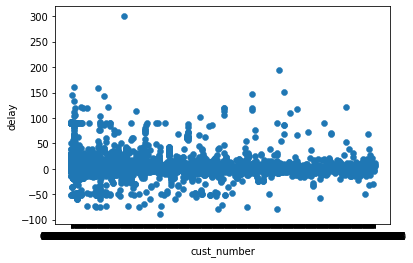

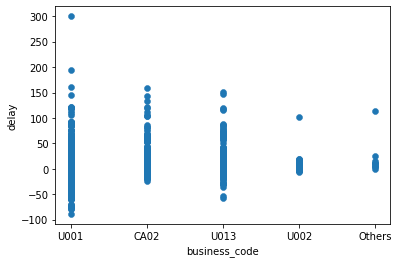

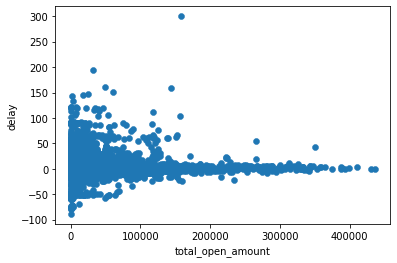

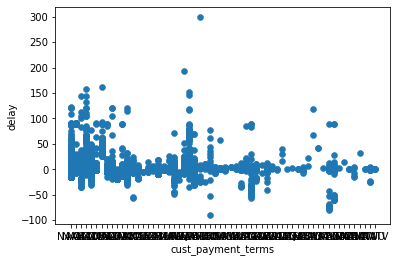

In [521]:
cat_feat = ['cust_number','business_code', 'total_open_amount', 'cust_payment_terms']
for col in cat_feat:
    plt.scatter(df_eda[col],df_eda['delay'],linewidth = .5)
    plt.xlabel(col)
    plt.ylabel('delay')
    plt.show()

There is an outliers in al features.

There is constant in delay 0 for all the features  
We have to do the encoding to these columns

### Outliers

<AxesSubplot:xlabel='total_open_amount'>

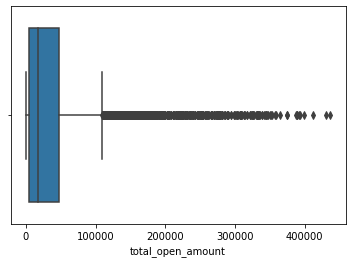

In [522]:
sns.boxplot(data=df,x='total_open_amount')


<AxesSubplot:xlabel='delay'>

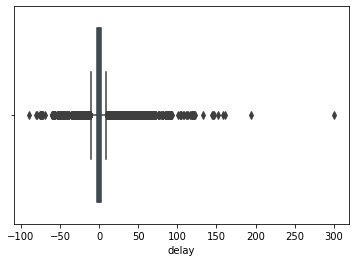

In [523]:
sns.boxplot(data=df,x='delay')

There is outliers in delay and amount

In [524]:
df_eda.describe()

,buisness_year,total_open_amount,due_term,delay
count,27999.0,27999.000000,27999.000000,27999.000000
mean,2019.0,31744.655862,17.423837,1.183149
std,0.0,39654.680821,10.987312,11.317778
min,2019.0,0.650000,0.000000,-89.000000
25%,2019.0,4607.930000,15.000000,-3.000000
50%,2019.0,16966.480000,15.000000,0.000000
75%,2019.0,45529.460000,15.000000,2.000000
max,2019.0,436544.160000,120.000000,300.000000


In [525]:
df.shape

(39999, 12)

Outlier detection with Percentile

In [526]:
upper_lim = df_eda['total_open_amount'].quantile(.95)
lower_lim = df_eda['total_open_amount'].quantile(.05)

In [527]:
df_eda[(df_eda['total_open_amount'] < upper_lim) & (df_eda['total_open_amount'] > lower_lim)].value_counts().sum()

25199

Outlier detection with Standard deviation

In [528]:
factor=3
upper_lim = df_eda['total_open_amount'].mean () + df_eda['total_open_amount'].std () * factor
lower_lim = df_eda['total_open_amount'].mean () - df_eda['total_open_amount'].std () * factor
print(upper_lim),print(lower_lim)

150708.69832373346
-87219.38660045763


(None, None)

### Removing the outlier  


#### As open amount can help us to determine if the big amount is there then the we have to see how is the delay pattern.  

#### it will give the model a better information

In [529]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 45921 to 26932
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27999 non-null  object        
 1   cust_number             27999 non-null  object        
 2   clear_date              27999 non-null  datetime64[ns]
 3   buisness_year           27999 non-null  float64       
 4   document_create_date.1  27999 non-null  datetime64[ns]
 5   due_in_date             27999 non-null  datetime64[ns]
 6   invoice_currency        27999 non-null  object        
 7   total_open_amount       27999 non-null  float64       
 8   baseline_create_date    27999 non-null  datetime64[ns]
 9   cust_payment_terms      27999 non-null  object        
 10  due_term                27999 non-null  int64         
dtypes: datetime64[ns](4), float64(2), int64(1), object(4)
memory usage: 2.6+ MB


In [530]:
X_train['business_code'].unique()

array(['U001', 'CA02', 'U013', 'U002', 'Others'], dtype=object)

In [531]:
X_train['cust_payment_terms'].unique()


array(['NAA8', 'NAH4', 'NAG2', 'CA10', 'NAD5', 'NAU5', 'NAX2', 'NAC6',
       'NAD1', 'NAAW', 'NAAX', 'NA32', 'NAUZ', 'NA3B', 'NA31', 'NA3F',
       'NAM1', 'NAM4', 'C106', 'NAM2', 'NAVQ', 'NAWP', 'NA10', 'NAVF',
       'NAVE', 'NAD4', 'BR56', 'NAVM', 'NA9X', 'NAB1', 'NA38', 'NAWM',
       'NAUP', 'NABG', 'NACB', 'NAGD', 'CA30', 'NAV2', 'NAVL', 'NAVC',
       'BR12', 'NA8Q', 'NATH', 'NAD8', 'NA25', 'NA84', 'NAM3', 'NAUX',
       'CAX2', 'NATK', 'NAVR', 'NAWN', 'B052', 'NATL', 'NATM', 'NAVD',
       'NAUW', 'NATU', 'NAWU', 'NATV'], dtype=object)

In [532]:
X_train['cust_number'].unique()

array(['0200726979', '0200769623', '0200799367', ..., '0100046892',
       '0100047366', '0200236570'], dtype=object)

### Encoding

In [533]:
# this fuction will transform to label Encoder
def transEncoder(df_enc,col):
    label_encoder=LabelEncoder()
    label_encoder.fit(df_enc[col])
    df_enc[col+'_enc']=label_encoder.transform(df_enc[col])
    return df_enc

# each quique value is being assigned with numbers, for eg business code: 'U001'-'0', 'CA02'-'1', 'U013'-'2', 'U002'-'3', 'Others'-'4'

In [534]:
# function will delete a column from train , val and test
def delete_col(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [535]:
cat_column=['cust_number','business_code','cust_payment_terms','invoice_currency']
for col in cat_column:
    X_train=transEncoder(X_train,col)
    X_test=transEncoder(X_test,col)
    X_val=transEncoder(X_val,col)
    X_train ,X_val, X_test = delete_col(col)
# ecah categorical columns is label encoded and real column is drop.
# main motive is to change the string type into integer type so that machine algo can understand

In [536]:
# Here we are droping the clear date as it is not requied -- it will overfit the model

X_train ,X_val, X_test = delete_col('clear_date')

In [537]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 45921 to 26932
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   buisness_year           27999 non-null  float64       
 1   document_create_date.1  27999 non-null  datetime64[ns]
 2   due_in_date             27999 non-null  datetime64[ns]
 3   total_open_amount       27999 non-null  float64       
 4   baseline_create_date    27999 non-null  datetime64[ns]
 5   due_term                27999 non-null  int64         
 6   cust_number_enc         27999 non-null  int32         
 7   business_code_enc       27999 non-null  int32         
 8   cust_payment_terms_enc  27999 non-null  int32         
 9   invoice_currency_enc    27999 non-null  int32         
dtypes: datetime64[ns](3), float64(2), int32(4), int64(1)
memory usage: 1.9 MB


In [538]:
# wrote a custom function to do a status check  on all the dataframes 
def status_check(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("****************************")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("************Train Null Count****************")
    print(traindf.isna().sum())
    print("************Test Null Count ****************")
    print(testdf.isna().sum())    
    print("************Val Null Count ****************")
    print(valdf.isna().sum())

In [539]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 45921 to 26932
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   buisness_year           27999 non-null  float64       
 1   document_create_date.1  27999 non-null  datetime64[ns]
 2   due_in_date             27999 non-null  datetime64[ns]
 3   total_open_amount       27999 non-null  float64       
 4   baseline_create_date    27999 non-null  datetime64[ns]
 5   due_term                27999 non-null  int64         
 6   cust_number_enc         27999 non-null  int32         
 7   business_code_enc       27999 non-null  int32         
 8   cust_payment_terms_enc  27999 non-null  int32         
 9   invoice_currency_enc    27999 non-null  int32         
dtypes: datetime64[ns](3), float64(2), int32(4), int64(1)
memory usage: 1.9 MB
None
****************************
(27999, 10) (6000, 10) (6000, 10)
************Train Nu

In [540]:
def dayMonthYearConv(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf[col+'.day'] = traindf[col].dt.day
    traindf[col+'.month'] = traindf[col].dt.month
    traindf[col+'.year'] = traindf[col].dt.year
    
    valdf[col+'.day'] = valdf[col].dt.day
    valdf[col+'.month'] = valdf[col].dt.month
    valdf[col+'.year'] = valdf[col].dt.year
    
    testdf[col+'.day'] = testdf[col].dt.day
    testdf[col+'.month'] = testdf[col].dt.month
    testdf[col+'.year'] = testdf[col].dt.year
    
    return traindf,valdf ,testdf

# this fuction change the dimedelta columns into day,month ,week columns so that it changes to inetger format and three dataset

In [541]:
X_train ,X_val, X_test = dayMonthYearConv('baseline_create_date')
X_train ,X_val, X_test = dayMonthYearConv('due_in_date')
X_train ,X_val, X_test = dayMonthYearConv('document_create_date.1')
#create a cloumn day month year

In [542]:
X_train ,X_val, X_test = delete_col('baseline_create_date')
X_train ,X_val, X_test = delete_col('due_in_date')
X_train ,X_val, X_test = delete_col('document_create_date.1')
# drop the original column

In [543]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 45921 to 26932
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   buisness_year                 27999 non-null  float64
 1   total_open_amount             27999 non-null  float64
 2   due_term                      27999 non-null  int64  
 3   cust_number_enc               27999 non-null  int32  
 4   business_code_enc             27999 non-null  int32  
 5   cust_payment_terms_enc        27999 non-null  int32  
 6   invoice_currency_enc          27999 non-null  int32  
 7   baseline_create_date.day      27999 non-null  int64  
 8   baseline_create_date.month    27999 non-null  int64  
 9   baseline_create_date.year     27999 non-null  int64  
 10  due_in_date.day               27999 non-null  int64  
 11  due_in_date.month             27999 non-null  int64  
 12  due_in_date.year              27999 non-null  int64  
 1

### CORRELATION MATRIX

It is done to see how each column is realted to each other

In [544]:
corrmat = X_train.merge(y_train , on = X_train.index).corr()
#correaltion matrix is stored in corrmat

<AxesSubplot:>

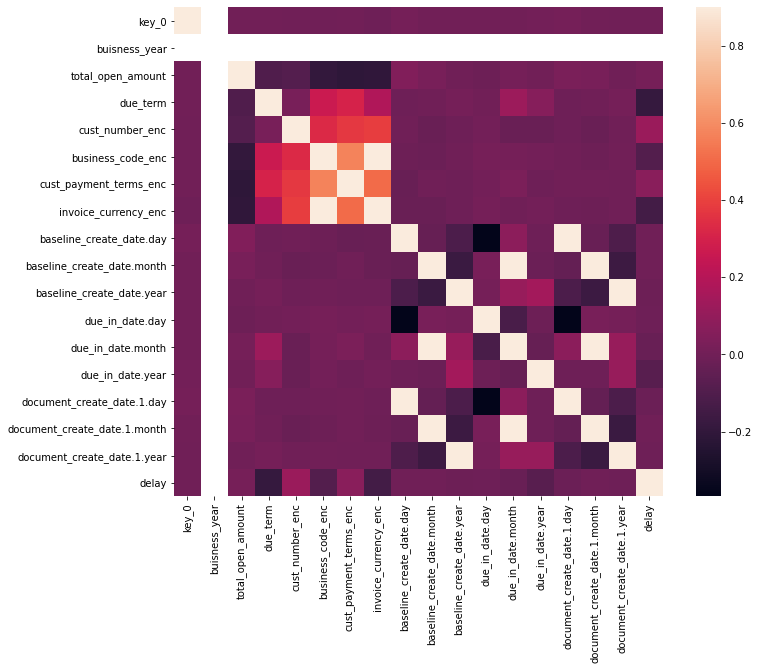

In [545]:
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
# it gives the visulization form of correlation matrix i.e in heatmap

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

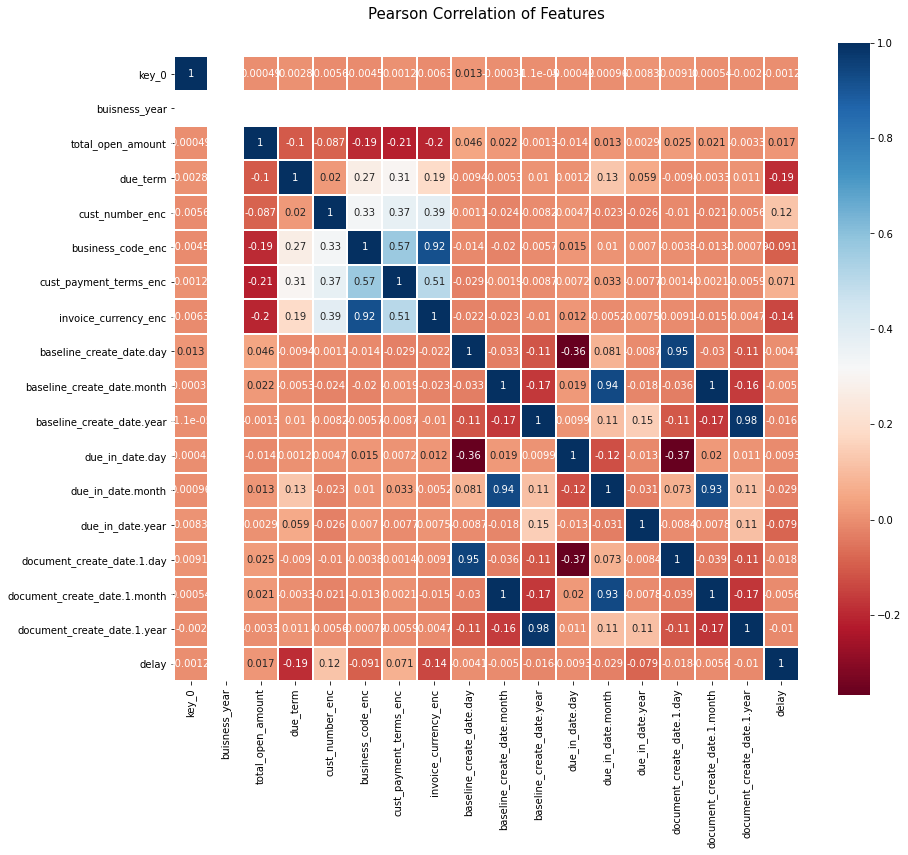

In [546]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# it gives pearson correation of features

#### here we can drop the business year column as it is consatnt

Here we see the values ranges from -1 to 1 where:
    -1 indicates a perfectly negative linear correlation between two variables
    0 indicates no linear correlation between two variables
    1 indicates a perfectly positive linear correlation between two variables
For eg: We can say business code and invoice currency gives 0.92 means the =y are strongly positive correlated to
each other

#### Removing The Quassi Constant

In [547]:
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set
constant_filter.fit(X_train)
#the number of non-constant features.
len(X_train.columns[constant_filter.get_support()])

15

In [548]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

1


In [549]:
# transpose the feature matrice
X_train_T = X_train.T
# print the number of duplicated features
print(X_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = X_train_T[X_train_T.duplicated()].index.values

0


In [550]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 45921 to 26932
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   buisness_year                 27999 non-null  float64
 1   total_open_amount             27999 non-null  float64
 2   due_term                      27999 non-null  int64  
 3   cust_number_enc               27999 non-null  int32  
 4   business_code_enc             27999 non-null  int32  
 5   cust_payment_terms_enc        27999 non-null  int32  
 6   invoice_currency_enc          27999 non-null  int32  
 7   baseline_create_date.day      27999 non-null  int64  
 8   baseline_create_date.month    27999 non-null  int64  
 9   baseline_create_date.year     27999 non-null  int64  
 10  due_in_date.day               27999 non-null  int64  
 11  due_in_date.month             27999 non-null  int64  
 12  due_in_date.year              27999 non-null  int64  
 1

In [551]:
X_train,X_val ,X_test = delete_col(['buisness_year'])
#business year column is droped

In [552]:
X_train,X_val,X_test = delete_col(['baseline_create_date.month'])

In [553]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)
# this function will return the correlated columns having variance greater than 80

In [554]:
handling_correlation(X_train.merge(y_train , on = X_train.index),0.85)
# gives the columns having variance greater than 85

['document_create_date.1.day',
 'invoice_currency_enc',
 'document_create_date.1.month',
 'document_create_date.1.year']

In [555]:
train=X_train.merge(y_train , on = X_train.index)

In [556]:
X_train_new=X_train.drop(['document_create_date.1.year','document_create_date.1.month'],axis=1)

In [557]:
handling_correlation(X_train_new.copy(),0.85)
# again correaltion graeter than 85 is found with droping the crrelated column
# there is no change in correlated columns

['document_create_date.1.day', 'invoice_currency_enc']

After removing these features the rmse and mse are high than the features intact with the dataframe

In [558]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 45921 to 26932
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_open_amount             27999 non-null  float64
 1   due_term                      27999 non-null  int64  
 2   cust_number_enc               27999 non-null  int32  
 3   business_code_enc             27999 non-null  int32  
 4   cust_payment_terms_enc        27999 non-null  int32  
 5   invoice_currency_enc          27999 non-null  int32  
 6   baseline_create_date.day      27999 non-null  int64  
 7   baseline_create_date.year     27999 non-null  int64  
 8   due_in_date.day               27999 non-null  int64  
 9   due_in_date.month             27999 non-null  int64  
 10  due_in_date.year              27999 non-null  int64  
 11  document_create_date.1.day    27999 non-null  int64  
 12  document_create_date.1.month  27999 non-null  int64  
 1

# Model Prediction

Since we have to predict the date and the output variable is in continous nature. The datas are also in continuous.
Thus we will use regression algorithms to predict the delay

### Linear Regression

Our goal is to forecast the delay so linear regression model is used fit model with train datas and the given delay from
the dataset

In [559]:
# this fuction gives root mean squared value and mean squared value
# mse = squared of mean 
# rmse =root squared of squared mean
def errorCheck(y_test,y_predict):
    mse=mean_squared_error(y_test,y_predict)
    rmse=mean_squared_error(y_test,y_predict,squared=False)
    print('mse,rmse: ')
    return mse,rmse

In [560]:
# Fitting Simple Linear Regression to the Training Set
base_model = LinearRegression()
base_model.fit(X_train, y_train)
y_predict = base_model.predict(X_val)

# we fit the model with the train dataset that doesnot have delay(X_train) and the dataset that only has delay(y_train)

In [561]:
print(errorCheck(y_test,y_predict))

# find the mse and rmse with predicted values from the model and delay that is already given in the dataset(i.e; y_test) 

mse,rmse: 
(207.8172496582806, 14.415867981439085)


### Decision Tree Regressor

Since it is regresssion problem we used decision tree regressor

In [562]:

# Fitting Decision Tree to the Training Set
dmodel = DecisionTreeRegressor()
dmodel.fit(X_train, y_train)

# Predicting the Val Set
y_predict1 = dmodel.predict(X_val)

# we fit the model with the train dataset that doesnot have delay(X_train) and the dataset that only has delay(y_train)

In [563]:
print(errorCheck(y_test,y_predict1))

# find the mse and rmse with predicted values from the model and delay that is already given in the dataset(i.e; y_test)

mse,rmse: 
(301.60133333333334, 17.366673064618144)


### XGBosst Regressor

Used XGBoost bbeacuse large number of obsevations in training data.  
Number feature is less than the number of observation in data set.  
Mixture of numerical and categorical feature

In [564]:
# Fitting XGBoost Regressor to the Training Set

xgbmodel = xgb.XGBRegressor()
xgbmodel.fit(X_train, y_train)

# Predicting the val Set Results
y_predict2 = xgbmodel.predict(X_val)

# we fit the model with the train dataset that doesnot have delay(X_train) and the dataset that only has delay(y_train)

In [565]:
print(errorCheck(y_test,y_predict2))

# find the mse and rmse with predicted values from the model and delay that is already given in the dataset(i.e; y_test)

mse,rmse: 
(1368.3317619297723, 36.99096865357505)


### Random Forest Regressor

It is Collection of different decision tree and gives the aggregate result from those

In [566]:
# Fitting Random Forest Regressor to the Training Set

rmodel = RandomForestRegressor()
rmodel.fit(X_train, y_train)

# Predicting the val Set Results
y_predict3 = rmodel.predict(X_val)

# we fit the model with the train dataset that doesnot have delay(X_train) and the dataset that only has delay(y_train)

In [567]:
print(errorCheck(y_test,y_predict3))

# find the mse and rmse with predicted values from the model and delay that is already given in the dataset(i.e; y_test)

mse,rmse: 
(136.18673184999997, 11.66990710545718)


Rnadom Forrest Regressor is used as it has low rmse and mse

Overfitting is cheked with X_test.  


In [568]:
y_predict_test = rmodel.predict(X_test)

# as we have chosen random forest regressor we predict the delay from this model
# We predict the delay for the X_test dataset

In [569]:
print(errorCheck(y_test,y_predict_test))

#y_test and predicted value from X_test rmse and mse is checked

mse,rmse: 
(154.76960640516666, 12.440643327624446)


# The dataset which has clear date as Null

### Now the dataset that clear date is null i.e the invoice is open is considered

We have :    
     1. A model  
     2. test data set with no clear date  
     3. all the feature engg , selection,encoding in train   
So now we have to predict the delay using the model and fill in the test dataset. And do the bucketization of the days

##### Our aim is to make the test dataframe identical to X_train

We have to bring test in same X_train format so we need to perform:
<ol>Same Pre Processing step </ol>
<ol>Same feature engg</ol>
<ol>Same feature selection</ol>
<ol>and feed this test dataset into the ML model and predict the dealy</ol>
We don't need to do split as we are not going to build model from this data set. <br>
We also don't need to do EDA as EDA has been performed earlier and the anlaysis is done to complete the model

In [570]:
test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,U001,200794332,COST us,NaN,2020.0,1.930671e+09,2020-03-20,20200319,20200320,20200404.0,USD,RV,1.0,4427.22,20200320.0,NAAX,1.930671e+09,1
13,U001,0200748108,KROGER associates,NaN,2020.0,1.930572e+09,2020-02-27,20200226,20200227,20200313.0,USD,RV,1.0,613.81,20200227.0,NAA8,1.930572e+09,1
16,U001,0200744019,TARG associates,NaN,2020.0,1.930757e+09,2020-04-07,20200407,20200407,20200422.0,USD,RV,1.0,82568.88,20200407.0,NAA8,1.930757e+09,1
18,U001,0200936373,SUPE in,NaN,2020.0,1.930777e+09,2020-04-13,20200411,20200413,20200428.0,USD,RV,1.0,51128.96,20200413.0,NAA8,1.930777e+09,1
21,U001,0200705372,FR corp,NaN,2020.0,1.930691e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,3330.01,20200325.0,NAA8,1.930691e+09,1


## Data Pre Processing

### Date Time Coversion

In [571]:
# For Test Data set
test['due_in_date'] = test['due_in_date'].apply(lambda x:strToDate(str(int(x))))
test['document_create_date'] = test['document_create_date'].apply(lambda x:strToDate(str(int(x))))
test['document_create_date.1'] = test['document_create_date.1'].apply(lambda x:strToDate(str(int(x))))
test['baseline_create_date'] = test['baseline_create_date'].apply(lambda x:strToDate(str(int(x))))

In [572]:
# Same date time coversion for Test Dataset
test['clear_date'] = pd.to_datetime(test['clear_date'],format='%Y-%m-%d')
test['posting_date'] = pd.to_datetime(test['posting_date'],format='%Y-%m-%d')
test['document_create_date'] = pd.to_datetime(test['document_create_date'],format='%Y-%m-%d')
test['document_create_date.1'] = pd.to_datetime(test['document_create_date.1'],format='%Y-%m-%d')
test['due_in_date'] = pd.to_datetime(test['due_in_date'],format='%Y-%m-%d')
test['baseline_create_date'] = pd.to_datetime(test['baseline_create_date'],format='%Y-%m-%d')

### Null Imputation

In [573]:
test.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

##### Drop the clear date as we are going to predict

In [574]:
X_main_test = test.drop(['clear_date'],axis=1)
X_main_test

# ALSO LETS DROP PRICE FROM MAIN TEST ITSELF
test.drop(['clear_date'], inplace =True,axis=1)

# we will be predicting the delay from X_main_test

In [575]:
X_main_test.shape

(10000, 17)

In [576]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49993
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   buisness_year           10000 non-null  float64       
 4   doc_id                  10000 non-null  float64       
 5   posting_date            10000 non-null  datetime64[ns]
 6   document_create_date    10000 non-null  datetime64[ns]
 7   document_create_date.1  10000 non-null  datetime64[ns]
 8   due_in_date             10000 non-null  datetime64[ns]
 9   invoice_currency        10000 non-null  object        
 10  document type           10000 non-null  object        
 11  posting_id              10000 non-null  float64       
 12  total_open_amount       10000 non-null  float6

#### Sort the values according to posting_date

In [577]:
X_main_test.sort_values(by='posting_date',inplace=True)

#### Removing the Duplicated and Constant values

In [578]:
X_main_test.cov()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen
buisness_year,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
doc_id,0.0,7.064680e+16,0.0,1.867812e+12,7.064680e+16,0.0
posting_id,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
total_open_amount,0.0,1.867812e+12,0.0,1.364517e+09,1.867812e+12,0.0
invoice_id,0.0,7.064680e+16,0.0,1.867812e+12,7.064680e+16,0.0
isOpen,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0


In [579]:
# Check for duplicated colum
X_main_test_trans = X_main_test.T
X_main_test_trans.duplicated()

business_code             False
cust_number               False
name_customer             False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1     True
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                     True
dtype: bool

In [580]:
duplicated_features = X_main_test_trans[X_main_test_trans.duplicated()].index.values
duplicated_features

array(['document_create_date.1', 'invoice_id', 'isOpen'], dtype=object)

In [581]:
X_main_test=X_main_test_trans.drop_duplicates(keep='last').T 
# removed the duplicated rows,
# transpose the dataframe back to the variables as columns
# keep first indicates that we keep the first of a set of
# duplicated variables

#shape of data frame
X_main_test.shape

(10000, 14)

In [582]:
X_main_test.isnull().sum()

business_code             0
cust_number               0
name_customer             0
buisness_year             0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

In [583]:
# Removing the unwanted columns
X_main_test = X_main_test.drop(columns = ['name_customer', 'document_create_date'])
#document_create_date has the normalized column document_create_date.1
#posting_date
#name_customer

In [584]:
X_main_test.columns

Index(['business_code', 'cust_number', 'buisness_year',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Constant features

In [585]:
X_main_test.nunique()

business_code                5
cust_number                670
buisness_year                1
document_create_date.1      84
due_in_date                126
invoice_currency             2
document type                1
total_open_amount         9071
baseline_create_date        86
cust_payment_terms          45
invoice_id                9698
isOpen                       1
dtype: int64

In [586]:
const_feat=[]
for col in list(X_main_test.columns):
    if(X_main_test[col].nunique()==1):
        const_feat.append(col)

X_main_test=X_main_test.drop(columns=const_feat)
X_main_test.shape

# performed same as above

(10000, 9)

In [587]:
test_cat_column=[ 'business_code' ,'cust_number' , 'cust_payment_terms']
for col in test_cat_column:
    print("Categorical columns: "+col)
    print(X_main_test[col].unique())
    print()
# Checking the unique features

Categorical columns: business_code
['CA02' 'U001' 'U013' 'U002' 'U005']

Categorical columns: cust_number
['0140106408' '0200769623' '0200707822' '0200705742' '0140104249'
 '0200407025' '0200014556' '0200737918' '0200794332' '0200915438'
 '0200762301' '0200759878' '0200337148' '0200726979' '0200720238'
 '0200657619' '0200782001' '0140104423' 'CCU013' '100034330' '0200729828'
 '0200772595' '0140104240' '0200466603' '0200783609' '0200434439'
 '0200742521' '0200152991' '0140104409' 'CCCA02' '0200707741' '0200743592'
 '0200820380' '0200936373' '0200781831' '0200780383' '0200761734'
 '0200071186' '0200418007' '0200342745' '0200609331' '0200764795'
 '0200797452' '0200721330' '0200795490' '0200974851' '0200718130'
 '0200779906' '0200881076' '0200799367' '0200752302' '0200749225'
 '0200186937' '0200723794' '0200782669' '0200793568' '200759878'
 '0140105686' '0100017545' '0200229974' '0200769369' '0200900909'
 '0200706844' '0200920735' '0200792734' '0200790107' '0200561861'
 '0200763229' '01000

In [588]:
# For catagorical columns with relatively low unique value -- looking for value_counts
# if unique count ==1 , constant column 

for col in test_cat_column:
    if X_main_test[col].nunique()<= 12:
        print(X_main_test[col].value_counts())
        print('#########################')

U001    9183
CA02     718
U013      69
U002      25
U005       5
Name: business_code, dtype: int64
#########################


In [589]:
#clubing the business code which has low value and mark them others
df['business_code'] = np.where(df['business_code'].isin(["U005"]),"Others",df['business_code'])

In [590]:
X_main_test['due_term']=pd.Series(X_main_test['due_in_date'] - X_main_test['baseline_create_date']).dt.days

# due term  --> no of days btween the day in which invoice is created and the day in which custommer is expected to pay
# same term is made in the above dataset i.e; X_train or df

## Encoding

In [591]:
cat_column=['cust_number','business_code','cust_payment_terms','invoice_currency']
for col in cat_column:
    X_main_test=transEncoder(X_main_test,col)
    X_main_test.drop(col, axis =1,inplace=True)
    
# label Encoding is done same as above to bring the test dataframe to same format as X_train

In [592]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8188 to 35306
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   document_create_date.1  10000 non-null  datetime64[ns]
 1   due_in_date             10000 non-null  datetime64[ns]
 2   total_open_amount       10000 non-null  object        
 3   baseline_create_date    10000 non-null  datetime64[ns]
 4   invoice_id              10000 non-null  object        
 5   due_term                10000 non-null  int64         
 6   cust_number_enc         10000 non-null  int32         
 7   business_code_enc       10000 non-null  int32         
 8   cust_payment_terms_enc  10000 non-null  int32         
 9   invoice_currency_enc    10000 non-null  int32         
dtypes: datetime64[ns](3), int32(4), int64(1), object(2)
memory usage: 961.2+ KB


In [593]:
col_date=['document_create_date.1','due_in_date','baseline_create_date']
for col in col_date:
    X_main_test[col+'.day'] = X_main_test[col].dt.day
    X_main_test[col+'.month'] = X_main_test[col].dt.month
    X_main_test[col+'.year'] = X_main_test[col].dt.year
    X_main_test.drop(col, axis =1,inplace=True)

#date columns are changed into day month year so that they become integer

In [594]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8188 to 35306
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   total_open_amount             10000 non-null  object
 1   invoice_id                    10000 non-null  object
 2   due_term                      10000 non-null  int64 
 3   cust_number_enc               10000 non-null  int32 
 4   business_code_enc             10000 non-null  int32 
 5   cust_payment_terms_enc        10000 non-null  int32 
 6   invoice_currency_enc          10000 non-null  int32 
 7   document_create_date.1.day    10000 non-null  int64 
 8   document_create_date.1.month  10000 non-null  int64 
 9   document_create_date.1.year   10000 non-null  int64 
 10  due_in_date.day               10000 non-null  int64 
 11  due_in_date.month             10000 non-null  int64 
 12  due_in_date.year              10000 non-null  int64 
 13  baseline_crea

In [595]:
X_main_test['total_open_amount']=pd.to_numeric(X_main_test['total_open_amount'])
X_main_test.drop('invoice_id', axis =1,inplace=True)

#invoice id is droped as its no use to determine the delay and it is not present in X_train
# since doing two transpose the data type of total_open_amount is changed to object so we converted back to float64

In [596]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8188 to 35306
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_open_amount             10000 non-null  float64
 1   due_term                      10000 non-null  int64  
 2   cust_number_enc               10000 non-null  int32  
 3   business_code_enc             10000 non-null  int32  
 4   cust_payment_terms_enc        10000 non-null  int32  
 5   invoice_currency_enc          10000 non-null  int32  
 6   document_create_date.1.day    10000 non-null  int64  
 7   document_create_date.1.month  10000 non-null  int64  
 8   document_create_date.1.year   10000 non-null  int64  
 9   due_in_date.day               10000 non-null  int64  
 10  due_in_date.month             10000 non-null  int64  
 11  due_in_date.year              10000 non-null  int64  
 12  baseline_create_date.day      10000 non-null  int64  
 13

In [597]:
corrmat_test =X_main_test.corr()



<AxesSubplot:>

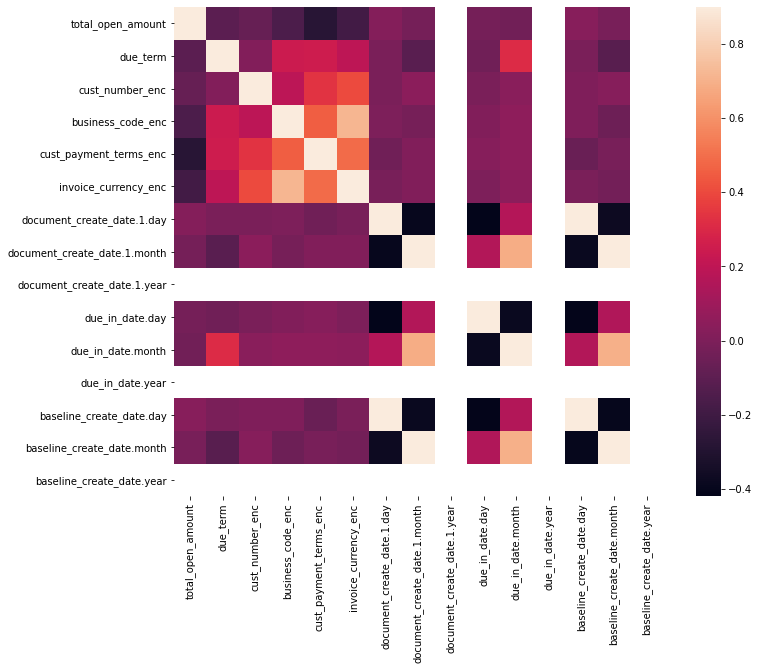

In [598]:
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat_test, vmax=0.9, square=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

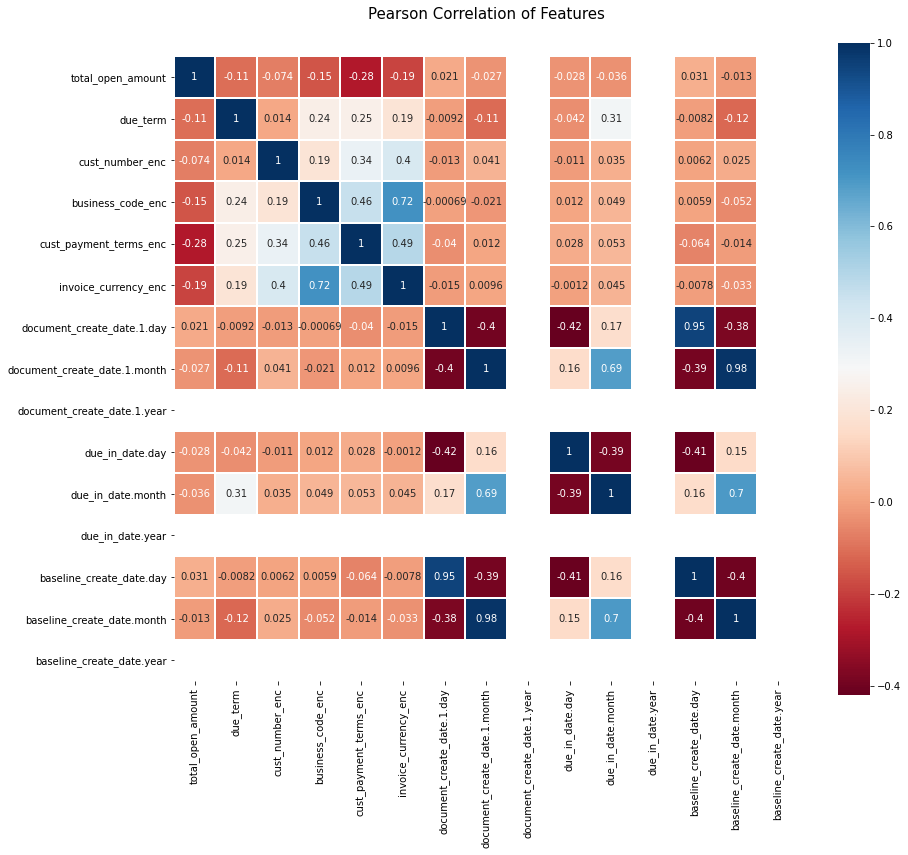

In [599]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_main_test.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [600]:
X_main_test=X_main_test.drop(['baseline_create_date.month'],axis=1)

It seems there are somme columns which are not correlated to each other but we are keeping them to maintain the fromat of X_train 

In [601]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8188 to 35306
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_open_amount             10000 non-null  float64
 1   due_term                      10000 non-null  int64  
 2   cust_number_enc               10000 non-null  int32  
 3   business_code_enc             10000 non-null  int32  
 4   cust_payment_terms_enc        10000 non-null  int32  
 5   invoice_currency_enc          10000 non-null  int32  
 6   document_create_date.1.day    10000 non-null  int64  
 7   document_create_date.1.month  10000 non-null  int64  
 8   document_create_date.1.year   10000 non-null  int64  
 9   due_in_date.day               10000 non-null  int64  
 10  due_in_date.month             10000 non-null  int64  
 11  due_in_date.year              10000 non-null  int64  
 12  baseline_create_date.day      10000 non-null  int64  
 13

### Quassi Constant

In [602]:
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(X_train)
#the number of non-constant features.
len(X_train.columns[constant_filter.get_support()])


14

In [603]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [604]:
# transpose the feature matrice
X_train_T = X_train.T
# print the number of duplicated features
print(X_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = X_train_T[X_train_T.duplicated()].index.values

0


In [605]:

def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

# same fuction as above in X_train

In [606]:
handling_correlation(X_train.merge(y_train , on = X_train.index),0.85)

['document_create_date.1.day',
 'invoice_currency_enc',
 'document_create_date.1.month',
 'document_create_date.1.year']

Since we have same correlation we are not removing and adding any feature as it was not added in the X_train

In [607]:
X_main_test.columns

Index(['total_open_amount', 'due_term', 'cust_number_enc', 'business_code_enc',
       'cust_payment_terms_enc', 'invoice_currency_enc',
       'document_create_date.1.day', 'document_create_date.1.month',
       'document_create_date.1.year', 'due_in_date.day', 'due_in_date.month',
       'due_in_date.year', 'baseline_create_date.day',
       'baseline_create_date.year'],
      dtype='object')

In [608]:
X_train.columns

Index(['total_open_amount', 'due_term', 'cust_number_enc', 'business_code_enc',
       'cust_payment_terms_enc', 'invoice_currency_enc',
       'baseline_create_date.day', 'baseline_create_date.year',
       'due_in_date.day', 'due_in_date.month', 'due_in_date.year',
       'document_create_date.1.day', 'document_create_date.1.month',
       'document_create_date.1.year'],
      dtype='object')

Checking the columns features and number

## Predicting The delay

In [609]:
# The delay is predected using rmodel as we have chosen this model
final_result = rmodel.predict(X_main_test)

In [610]:
# We store the predicted delay with series name delay in final_result and the value is ceil becuase the day should be integer
final_result = pd.Series(final_result,name='delay')

In [611]:
final_result.head()

0     8.96
1   -26.55
2     4.60
3   -26.93
4     4.82
Name: delay, dtype: float64

In [612]:
# resetting the index of main test so that we can merge delay series with it
test.reset_index(drop=True,inplace=True)

In [613]:
Final = test.merge(final_result , on = X_main_test.index )
Final.drop('key_0',axis=1,inplace=True)

In [614]:
Final['delay']=Final['delay'].apply(np.ceil)

In [615]:
def bucketization(x):
    if x<0:
        return('(< 0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')
    
#this funtion will buketize the delay into no of days such as < 0 days,0-15 days.. etc.

In [616]:
Final['DELAY BUCKET']= pd.Series([bucketization(x=Final['delay'][i])  for i in range(len(Final))])
# bucketiztion fucnction is called and delay bucket column is made

In [617]:
Final['delay']=Final['delay'].apply(pd.to_timedelta,unit = 'D')
# Now the integer delay vaalue is changed to timedelta with unit ='D'

In [618]:
Final['delay']

0        9 days
1      -26 days
2        5 days
3      -26 days
4        5 days
         ...   
9995     6 days
9996    14 days
9997    20 days
9998    21 days
9999    21 days
Name: delay, Length: 10000, dtype: timedelta64[ns]

In [619]:
Final['clear_date'] = Final['due_in_date'] +  pd.to_timedelta(Final['delay'], unit='d')
# Since delay =clear date- due in date
# then clear date=delay +due in date

In [620]:
Final

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,DELAY BUCKET,clear_date
0,U001,200794332,COST us,2020.0,1.930671e+09,2020-03-20,2020-03-19,2020-03-20,2020-04-04,USD,RV,1.0,4427.22,2020-03-20,NAAX,1.930671e+09,1,9 days,(0-15) Days,2020-04-13
1,U001,0200748108,KROGER associates,2020.0,1.930572e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,613.81,2020-02-27,NAA8,1.930572e+09,1,-26 days,(< 0) Days,2020-02-16
2,U001,0200744019,TARG associates,2020.0,1.930757e+09,2020-04-07,2020-04-07,2020-04-07,2020-04-22,USD,RV,1.0,82568.88,2020-04-07,NAA8,1.930757e+09,1,5 days,(0-15) Days,2020-04-27
3,U001,0200936373,SUPE in,2020.0,1.930777e+09,2020-04-13,2020-04-11,2020-04-13,2020-04-28,USD,RV,1.0,51128.96,2020-04-13,NAA8,1.930777e+09,1,-26 days,(< 0) Days,2020-04-02
4,U001,0200705372,FR corp,2020.0,1.930691e+09,2020-03-25,2020-03-24,2020-03-25,2020-04-09,USD,RV,1.0,3330.01,2020-03-25,NAA8,1.930691e+09,1,5 days,(0-15) Days,2020-04-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200418007,AM co,2020.0,1.930788e+09,2020-04-17,2020-04-14,2020-04-17,2020-06-21,USD,RV,1.0,27417.60,2020-04-17,NAGD,1.930788e+09,1,6 days,(0-15) Days,2020-06-27
9996,U001,0200777735,NASH associates,2020.0,1.930686e+09,2020-03-23,2020-03-22,2020-03-23,2020-04-07,USD,RV,1.0,81859.78,2020-03-23,NAA8,1.930686e+09,1,14 days,(0-15) Days,2020-04-21
9997,CA02,0140106408,WAL-M corporation,2020.0,2.960626e+09,2020-04-01,2020-04-01,2020-04-01,2020-04-11,CAD,RV,1.0,62156.26,2020-04-01,CA10,2.960626e+09,1,20 days,(16-30) Days,2020-05-01
9998,U001,0200803720,DEC systems,2020.0,1.930873e+09,2020-05-07,2020-05-07,2020-05-07,2020-05-11,USD,RV,1.0,4708.50,2020-05-01,NAM2,1.930873e+09,1,21 days,(16-30) Days,2020-06-01


In [621]:
test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200794332,COST us,2020.0,1.930671e+09,2020-03-20,2020-03-19,2020-03-20,2020-04-04,USD,RV,1.0,4427.22,2020-03-20,NAAX,1.930671e+09,1
1,U001,0200748108,KROGER associates,2020.0,1.930572e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,613.81,2020-02-27,NAA8,1.930572e+09,1
2,U001,0200744019,TARG associates,2020.0,1.930757e+09,2020-04-07,2020-04-07,2020-04-07,2020-04-22,USD,RV,1.0,82568.88,2020-04-07,NAA8,1.930757e+09,1
3,U001,0200936373,SUPE in,2020.0,1.930777e+09,2020-04-13,2020-04-11,2020-04-13,2020-04-28,USD,RV,1.0,51128.96,2020-04-13,NAA8,1.930777e+09,1
4,U001,0200705372,FR corp,2020.0,1.930691e+09,2020-03-25,2020-03-24,2020-03-25,2020-04-09,USD,RV,1.0,3330.01,2020-03-25,NAA8,1.930691e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200418007,AM co,2020.0,1.930788e+09,2020-04-17,2020-04-14,2020-04-17,2020-06-21,USD,RV,1.0,27417.60,2020-04-17,NAGD,1.930788e+09,1
9996,U001,0200777735,NASH associates,2020.0,1.930686e+09,2020-03-23,2020-03-22,2020-03-23,2020-04-07,USD,RV,1.0,81859.78,2020-03-23,NAA8,1.930686e+09,1
9997,CA02,0140106408,WAL-M corporation,2020.0,2.960626e+09,2020-04-01,2020-04-01,2020-04-01,2020-04-11,CAD,RV,1.0,62156.26,2020-04-01,CA10,2.960626e+09,1
9998,U001,0200803720,DEC systems,2020.0,1.930873e+09,2020-05-07,2020-05-07,2020-05-07,2020-05-11,USD,RV,1.0,4708.50,2020-05-01,NAM2,1.930873e+09,1


In [622]:
X_main_test

,total_open_amount,due_term,cust_number_enc,business_code_enc,cust_payment_terms_enc,invoice_currency_enc,document_create_date.1.day,document_create_date.1.month,document_create_date.1.year,due_in_date.day,due_in_date.month,due_in_date.year,baseline_create_date.day,baseline_create_date.year
8188,66257.10,10,175,0,3,0,27,2,2020,9,3,2020,28,2020
685,3899.71,15,405,1,29,1,27,2,2020,13,3,2020,27,2020
38198,29751.36,15,310,1,13,1,27,2,2020,13,3,2020,27,2020
9667,933.62,15,405,1,29,1,27,2,2020,13,3,2020,27,2020
10562,22902.19,20,305,1,23,1,27,2,2020,18,3,2020,27,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27757,194864.00,10,254,1,6,1,19,5,2020,29,5,2020,19,2020
38468,1373.60,10,163,0,3,0,19,5,2020,29,5,2020,19,2020
5655,50023.54,30,53,4,39,1,20,5,2020,19,6,2020,20,2020
15060,16.76,30,380,1,25,1,21,5,2020,20,6,2020,21,2020


In [623]:
#Final.to_csv(r'D:\PDPredictor\Final.csv')

###         The Final dataset with the delay, bucket value and clear date with predicted value from Ml Model